# [L03: Grid Approximation TSP](https://docs.google.com/document/d/1PIzgQa9iLFFrNkSYzNr6Bj-NtsB-UywrwfYtk5HSfv4)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Eren Gul

**SUMMARY**:
After reviewing the existing codebase and previous labs carefully, i designed the recursion for the grid approximation function. I first came up with the base case, and then the recursive case. Then, I designed the first version of the combineTours function. It took me many tries to improve this function, and I don't think it is still giving a correct result, though I think it is close. Throughout this assignment, I embraced an agile approach where I iterated over my original design over and over. It was exhausting and took a lot of effort.

**PERSONNEL**
I finished this assignment all by myself.

**CHALLENGES**:
There were two largest challenges for me during this assignment. First one was to get the recursive case right, and the second one was to get the entire combineTour function right.

**INNOVATIONS**:
There were no innovations

**TESTING**:
As I mentioned above, I embraced an iterative approach on testing and building this code. I ran the code every time after a change. However, I did not do any unit tests of any sort.

**ERRORS**:
I do not think this code is giving a 100% correct result. It outputs a tour, but I don't think it is correct.

**COMMENTS**:

It was by far the hardest homework of this semester. It was very exhausting.

## Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen
import random
import itertools

### Read data

In [6]:
def get_new_node_coords(numnodes, scale=1):
    nodeStr = f'{numnodes}\n'
    coords = []
    for i in range(numnodes):
        x, y = random.randint(1, numnodes//scale), random.randint(1, numnodes//scale)
        while (x, y) in coords:
            x, y = random.randint(1, numnodes//scale), random.randint(1, numnodes//scale)
        coords.append((x, y))
        nodeStr += f'{x} {y}\n'
    return nodeStr


#tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-48.txt").read().decode('ASCII')
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
#tspdata = get_new_node_coords(20)
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

[5, 2, 2, 4, 3, 1, 1, 3, 0, 0, 1]


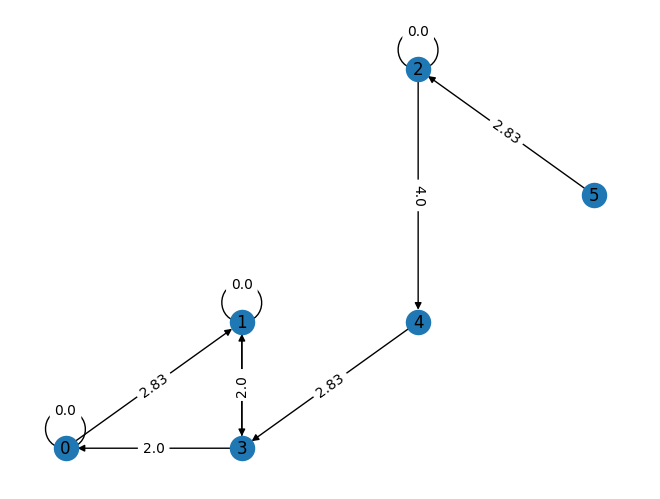

In [13]:
"""

Given certain input, it uses the grid approximation algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.route = []

    def extractData(self, inputFile=""):
        """ Iterates through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        WTSPC = ['\n', '\r', '\t', ' ']
        inputData = inputFile.split()
        cleanData = [int(i) for i in inputData if i not in WTSPC]

        self.dimension = cleanData[0]

        for i in range(1, len(cleanData), 2):
            nodeX = cleanData[i]
            nodeY = cleanData[i + 1]
            self.nodeData.append([nodeX, nodeY])

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        for i in range(len(self.nodeData)):
            self.coords[i] = self.nodeData[i]

    def getDirection(self, a, b, c):
        """ Determines if the angle made by the path a-b-c is clockwise or
            couter clockwise
        Arguments:
            a {int} -- the integer index of a node
            b {int} -- the integer index of a node
            c {int} -- the integer index of a node
        Returns:
            {int} -- 1 if a->b->c is clockwise, -1 if counterclockwise
        """
        ax, ay = self.coords[a][0], self.coords[a][1]
        bx, by = self.coords[b][0], self.coords[b][1]
        cx, cy = self.coords[c][0], self.coords[c][1]
        val = (by-ay)*(cx-bx)-(bx-ax)*(cy-by)
        if val < 0:
            return -1
        elif val > 0:
            return 1
        return 0

    def calculateDistance(self, a, b):
        """ Calculates & returns the distance between points a and b
        Arguments:
            a {tuple (int)} -- tuple of numbers for the x and y coordinate of a node
            b {tuple (int)} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            {float} -- the distance between the two points using the distance formula
        """
        x1 = float(a[0])
        y1 = float(a[1])
        x2 = float(b[0])
        y2 = float(b[1])
        xSquared = math.pow(x2 - x1, 2)
        ySquared = math.pow(y2 - y1, 2)
        c = round(math.sqrt(xSquared + ySquared), 2)
        return c

    def calculateTotalDistance(self, route=None):
        """
        """
        if route == None:
            route = self.route

        total = 0
        for i in range(len(route) - 1):
            n1 = self.coords[route[i]]
            n2 = self.coords[route[i+1]]
            total += self.calculateDistance(n1, n2)
        return total

    def getAllTours(self, nodes):
        """ Calculates all possible tours using nodes from 'nodes'
        Arguments:
            nodes {list (int)} -- List of node numbers
        Returns:
            A list of tuples, each tuple representing a single tour
        """
        tours = list(itertools.permutations(nodes))
        return [list(t) + [t[0]] for t in tours]

    def isClockwise(self, route):
        """ Decides if a route contains only clockwise angles
            NOTE: If route is of size 5, there can be a single angle that is
            the opposite of the others.
        Arguments:
            route {list (int)} -- List of node numbers on route
        Returns:
            {bool} True if all angles are clockwise, False otherwise
        """
        edges = [(route[i], route[i+1], route[i+2]) for i in range(len(route) - 2)]
        return all([self.getDirection(a, b, c) in [0, 1] for (a, b, c) in edges])

    def isCounterclockwise(self, route):
        """ Decides if a route contains only counterclockwise angles
            NOTE: If route is of size 5, there can be a single angle that is
            the opposite of the others.
        Arguments:
            route {list (int)} -- List of node numbers on route
        Returns:
            {bool} True if all angles are clockwise, False otherwise
        """
        edges = [(route[i], route[i+1], route[i+2]) for i in range(len(route) - 2)]
        return all([self.getDirection(a, b, c) in [0, -1] for (a, b, c) in edges])

    def horizontalPartition(self, nodes, xval):
        """ Splits the list 'nodes' into two lists, left and right, such that
            all nodes in 'left' have an x-coordinate less than or equal to
            xval, and all nodes in 'right' have an x-coordinate greater than or
            equal to xval.

            *** NOTE: THIS DOES NOT BREAK TIES.  ANY NODE WITH AN X-COORDINATE
            EQUAL TO XVAL WILL GO TO BOTH LISTS.  YOU MUST DECIDE HOW TO
            BREAK THE TIE.
        Arguments:
            nodes {list (int)} -- the list of nodes to partition
            xval {int} -- the x-coordinate boundary between partitions
        Returns:
            Two lists of ints, 'left' and 'right'.  If any nodes lie on the
            boundary, they will be included in both lists.
        """
        bounds = self.getBounds(list(range(self.graph.number_of_nodes())))
        xmin, xmax = bounds['xmin'], bounds['xmax']
        ymin, ymax = bounds['ymin'], bounds['ymax']

        left = self.getNodesBetween(nodes, xmin, xval, ymin, ymax)
        right = self.getNodesBetween(nodes, xval, xmax, ymin, ymax)
        return left, right

    def verticalPartition(self, nodes, yval):
        """ Splits the list 'nodes' into two lists, top and bottom, such that
            all nodes in 'top' have a y-coordinate greater than or equal to
            yval, and all nodes in 'bottom' have a y-coordinate less than or
            equal to yval.

            *** NOTE: THIS DOES NOT BREAK TIES.  ANY NODE WITH A Y-COORDINATE
            EQUAL TO YVAL WILL GO TO BOTH LISTS.  YOU MUST DECIDE HOW TO
            BREAK THE TIE.
        Arguments:
            nodes {list (int)} -- the list of nodes to partition
            yval {int} -- the y-coordinate boundary between partitions
        Returns:
            Two lists of ints, 'top' and 'bottom'.  If any nodes lie on the
            boundary, they will be included in both lists.
        """
        bounds = self.getBounds(list(range(self.graph.number_of_nodes())))
        xmin, xmax = bounds['xmin'], bounds['xmax']
        ymin, ymax = bounds['ymin'], bounds['ymax']

        top = self.getNodesBetween(nodes, xmin, xmax, yval, ymax)
        bottom = self.getNodesBetween(nodes, xmin, xmax, ymin, yval)
        return top, bottom

    def getBounds(self, nodes):
        """ Gets the bounding box containing every node in 'nodes'
        Arguments:
            nodes {list (int)} -- List of node numbers to bound
        Returns:
            dict {(str) : (int)} mapping the strings 'xmax', 'xmin', 'ymax', 'ymin'
            to the corresponding bounding values
        """
        allcoords = [self.coords[i] for i in nodes]
        myx = [i[0] for i in allcoords]
        myy = [i[1] for i in allcoords]
        return {'xmax': max(myx), 'xmin': min(myx),
                'ymax': max(myy), 'ymin': min(myy)}

        # To use this elsewhere in the code, do something like:
        # bounds = self.getBounds([0, 1, 2, 3, 4])
        # my_minimum_x_value = bounds['xmin']
        # my_maximum_y_value = bounds['ymax']

    def getNodesBetween(self, nodes, xmin, xmax, ymin, ymax):
        """ Returns all nodes within the specified bounding box
        Argments:
            nodes {list (int)} -- the list of nodes to search within
            xmin {int} -- The minimum x-value for any node
            xmax {int} -- The maximum x-value for any node
            ymin {int} -- The minimum y-value for any node
            ymax {int} -- The maximum y-value for any node
        Returns:
            {list (int)} -- A list of node numbers that fall within the
            specified bounding box
        """
        ret = []
        for i in nodes:
            myx = self.coords[i][0]
            myy = self.coords[i][1]
            if (xmin <= myx <= xmax) and (ymin <= myy <= ymax):
                ret.append(i)
        return ret

    def gridApprox(self, currentNodes=None):
      if currentNodes is None:
        currentNodes = list(self.coords.keys())
      if len(currentNodes) <= 3: # This is the base case
        all_tours = self.getAllTours(currentNodes)
        clockwise_tours = [tour for tour in all_tours if self.isClockwise(tour)]
        self.route = min(clockwise_tours, key=self.calculateTotalDistance)
        return self.route
      else: # recursive case
        bounds = self.getBounds(currentNodes)
        x_range = bounds['xmax'] - bounds['xmin']
        y_range = bounds['ymax'] - bounds['ymin']
        if x_range > y_range:
          left, right = self.horizontalPartition(currentNodes, bounds['xmin'] + x_range / 2)
          tour_left = self.gridApprox(left)
          tour_right = self.gridApprox(right)
          return self.combineTours(tour_left, tour_right, split='horizontal')
        else:
            top, bottom = self.verticalPartition(currentNodes, bounds['ymin'] + y_range / 2)
            tour_top = self.gridApprox(top)
            tour_bottom = self.gridApprox(bottom)
            return self.combineTours(tour_top, tour_bottom, split='vertical')
    def combineTours(self, tour1, tour2, split='horizontal'):
        min_dist = float('inf')
        best_pair = None
        for node1 in tour1:
          for node2 in tour2:
              dist = self.calculateDistance(self.coords[node1], self.coords[node2])
              if dist < min_dist:
                  min_dist = dist
                  best_pair = (node1, node2)
        idx1 = tour1.index(best_pair[0])
        idx2 = tour2.index(best_pair[1])
        combined_tour = tour1[idx1:] + tour1[:idx1] + tour2[idx2:] + tour2[:idx2]
        return combined_tour


    def addNodes(self):
        """ Adds nodes to the networkx graph
        """
        for node in self.coords:
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self, route=None):
        """Adds edges to a networkx graph
        """
        if route == None:
            route = self.route
        x = 0
        while x < len(route) - 1:
            self.graph.add_edge(route[x], route[x+1],
                                weight=self.calculateDistance(self.coords[route[x]], self.coords[route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()


def main():
    # Create TSP object
    tsp = TSP()

    # Perform initial setup with data generated above
    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.route = tsp.gridApprox(list(range(tsp.graph.number_of_nodes())))
    tsp.addEdges()
    print(tsp.route)
    tsp.showGraph()

main()

## Integrity statement
I have not received help from anybody, nor given help to anybody in completion of this assignment. However, I utizilied generative AI as a guide in explaining code and providing feedback over my code. I did not make the generative AI write the code from scratch, I just used it as a tool in finishing this assignment.